In [5]:
import networkx as nx

import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from lib.core import *
from lib.inout import *


In [2]:
G=nx.Graph()
G.add_node("A")
G.add_node("B")
G.add_node("C")
G.add_node("E")
G.add_node("G")
G.add_edges_from([("A","B"),("A","C"),("B","C"),("B","G"),("C","E"),("E","G")])


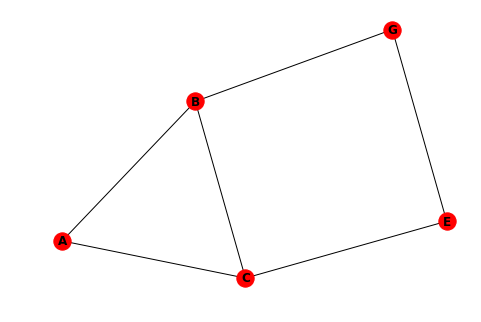

In [3]:
nx.draw(G,with_labels=True,font_weight="bold")
#option={'node_color':black}
plt.show()

In [4]:
def BDDE(G,param=None):
    global parametri
    if(param!=None):
        parametri=param
    else:
        parametri=parametriDefault()
    ListaNodi=["A"]#list(G.nodes)

    #bestSolution=[] bestScore=100000
    for v in ListaNodi:
        radice=v
        parametri['radice']=radice
        B=nx.DiGraph()
        parametri['B']=B
        #print("Radice: "+v)
        DEPTH(G,[],v,[])
        G.remove_node(v)
        
        print(B.nodes)
        print(B.edges)
        nx.draw(B,with_labels=True,font_weight="bold",arrow=False)
        plt.show()
        input()

        #Esamino albero binomiale ricavato da sopra
        if(len(B)!=0):
           
            leafs=[]
            radice=None
            for n in B:
                if(B.out_degree(n)==0):#allora è una foglia
                    leafs.append(n)
                if(B.in_degree(n)==0):#allora è la radice
                    radice=n
            for n in leafs:
                #trovo ramo che parte dalla radice e va fino alla foglia
                #corrisponde al sottografo connesso che vogliamo esaminare
                Percorso=nx.shortest_path(B,radice,n)
                """"
                print(Percorso)
                score=obj_func(parametri['pazienti'],Percorso)
                if(score<bestScore):
                    bestScore=score
                    BestSolution=Percorso
                """
    return (bestSolution,bestScore)    
        
def BREADTH(G,S,n,U):
    #print("BREADTH")
    #print("S: "+str(S)+"    Vertice:"+str(n)+"    U:"+str(U))    
    vn=n.data
    if vn in U :
        return None
    
    S1=S+[vn]
    if(not boundFunction(S1)):
        return None
    
    B=parametri['B']   
    n1=Nodo(vn)
    for nxx in getNodesFromBranch(n):#nxx sarebbe n*
        n2=BREADTH(G,S1,nxx,U)
        if(n2!=None):
            B.add_edge(n1,n2)
    return n1
    
def DEPTH(G,S,v,beta):
    #print("DEPTH")
    #print("S: "+str(S)+"    Vertice:"+str(v)+"    beta:"+str(beta))
    S1=S+[v]
    if(not boundFunction(S1)):
        return None
    
    n=Nodo(v)
    beta1=[]
        
    #extensione set: xn=dnk-cnk
    xn=getxn(G,S,v)
    xn.sort(reverse=True)
    #print("Xn:"+str(xn))
    B=parametri['B']
    for i  in range(0,len(beta),1):
        n1=BREADTH(G,S1,beta[i],xn)
        if(n1!=None):
            B.add_edge(n,n1)
            beta1.append(n1)
    for v in xn:
        n1=DEPTH(G,S1,v,beta1)
        if(n1!=None):
            B.add_edge(n,n1)
            beta1.append(n1)
    return n
 
    
def getNodesFromBranch(n):
    B=parametri['B']
    W=[]
    neighbors=B.neighbors(n)
    for v in neighbors:
        if B.has_edge(n,v):
            W.append(v)
    return W

def boundFunction(S):
    
    return parametri['funzioneLimite'](parametri['matriceBinaria'],
                                parametri['pazienti'],S,parametri['k'],
                                parametri['soglia']
                                )
def getxn(G,S,v):
    neighbors=G.neighbors(v)
    L=nx.Graph()
    L.add_nodes_from(neighbors)
    
    if parametri['radice'] in L:
        L.remove_node(parametri['radice'])
    for n in S:
        if n!=v:#in teoria questo non dovrebbe servire
            L.remove_nodes_from(G.neighbors(n))
    return list(L.nodes())

def calcoloFunzioneLimiteSimple(matriceBinaria,pazienti,S,k,soglia):
    if(len(S)>k):
        return False
    return True
def parametriDefault():
    print("uso parametri di default")
    parametri={}
    parametri['k']=10
    parametri['soglia']=0.8
    parametri['matriceBinaria']=None
    parametri['pazienti']=None
    parametri['funzioneLimite']=calcoloFunzioneLimiteSimple
    return parametri
#Nota:i dati del nodo rappresenta l'etichetta del vertice
#tale etichetta può essere qualsiasi cosa inclusi stringhe e numeri
class Nodo(object):
    def __init__(self,data):
        self.data=data
    def __str__(self):
        return str(self.data)
    def __repr__(self):
        return str(self) 

uso parametri di default
[E, G, C, A, C, E, B, G, C, E, C]
[(E, G), (C, E), (A, C), (A, B), (C, E), (B, C), (B, G), (G, C), (G, E), (E, C)]


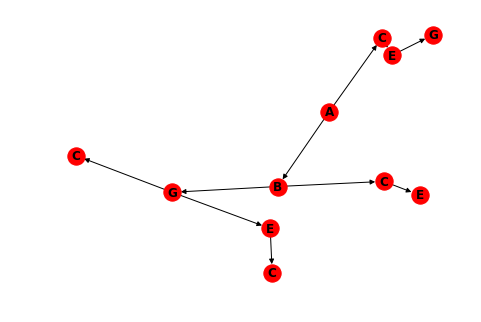

In [5]:
BDDE(G)

In [ ]:
G = loadNetwork("../data/hint+hi2012_edge_file.txt")

id_to_str, str_to_id = read_genes("../data/hint+hi2012_index_file.txt")
patients = read_patients("../data/snvs.tsv", str_to_id)

parametri['k']=3
parametri['delta']=0.8
parametri['pazienti']=patients
parametri['score_func']=obj_func

bestSolution,bestScore=BDDE(G,parametri)   
